## Task 3 - Hypothesis Testing

This task focus on training and evaluating the MLP again after rescaling to the range (10,15). Hypothesis testing is then done to evaluate both the models developed. After thorough evaluation, it can be seen that the null hypothesis is rejected - showing a clear difference between the two.

In [1]:
import matplotlib.pyplot as plt 
from ipynb.fs.full.functions import (
    fetch_datasets, find_categorical_features, find_non_unique_features, 
    load_model, save_model,
    normalise_min_max_task_3, normalise_min_max,
    mlp_classifier, find_best_configuration_mlp,
    plot_feature_split_of_values, plot_class_split_of_values, plot_predicted_vs_actual, plot_confusion_matrix, plot_det_curve, plot_roc_curve, plot_precision_recall_curve,
    fetch_classification_report,
    fetch_accuracy_score, fetch_log_loss
)
import warnings
from sklearn.exceptions import ConvergenceWarning
from scipy.stats import ttest_rel, ttest_ind
from sklearn.model_selection import cross_val_score

-----
## Pre-Processing and Transformation

In [2]:
x_train, x_test, y_train, y_test = fetch_datasets()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16200, 512)
(5400, 512)
(16200,)
(5400,)


First, outlier detection was done to check for whether there was a presence of (i) non unique value containing features, (ii) categorical features, or (iii) features with missing values. After this was checked and validated that there were no outliers - rescaling could proceed.

No features with 1 unique value in x_train
No features with 1 unique value in x_test
No categorical features in x_train
No categorical features in x_test
x_train has the following missing values - 0
x_test has the following missing values - 0
y_train has the following missing values - 0
y_test has the following missing values - 0


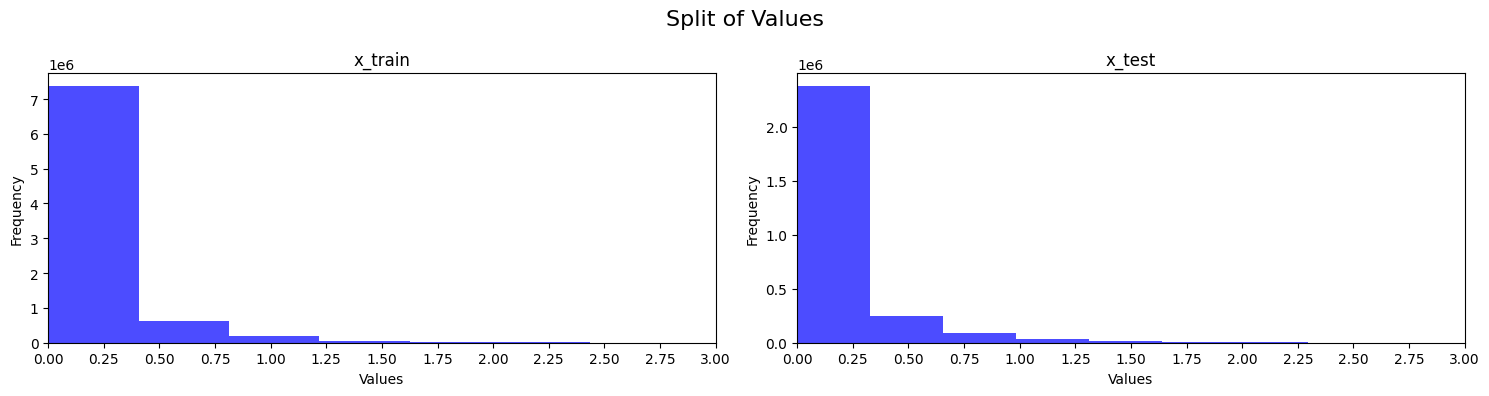

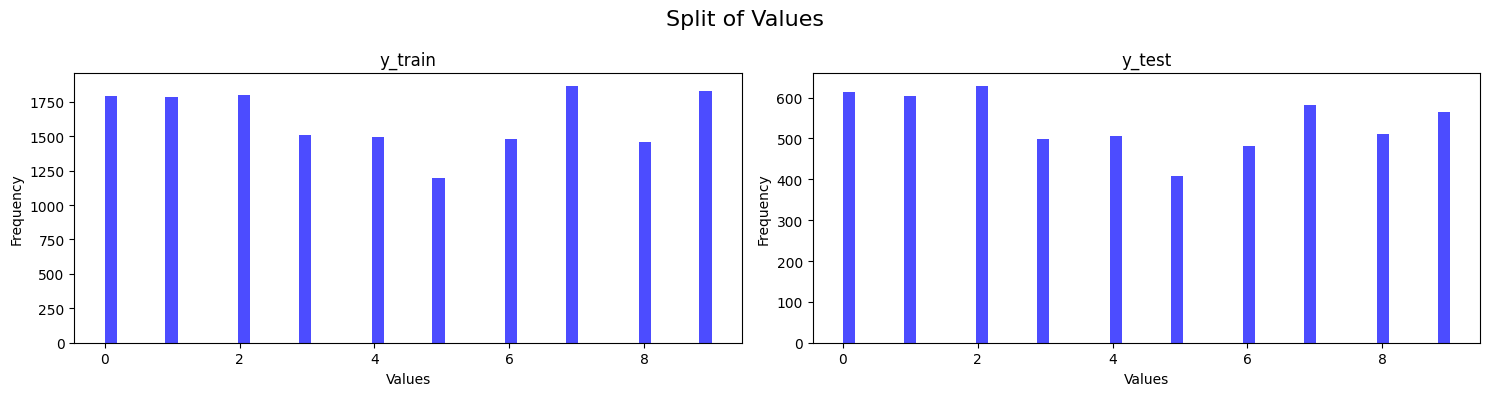

In [3]:
find_non_unique_features(x_train, "x_train")
find_non_unique_features(x_test, "x_test")

categorical_features_x_train = find_categorical_features(x_train, "x_train")
categorical_features_x_test = find_categorical_features(x_test, "x_test")
# Add function convert all int to float
print(f"x_train has the following missing values - {find_missing_values(x_train)}")
print(f"x_test has the following missing values - {find_missing_values(x_test)}")
print(f"y_train has the following missing values - {find_missing_values(y_train)}")
print(f"y_test has the following missing values - {find_missing_values(y_test)}")

plot_feature_split_of_values([x_train, x_test], ["x_train", "x_test"])
plot_class_split_of_values([y_train, y_test], ["y_train", "y_test"])

The datasets after rescaling to the range (10, 15) were implemented using MinMaxScaler.

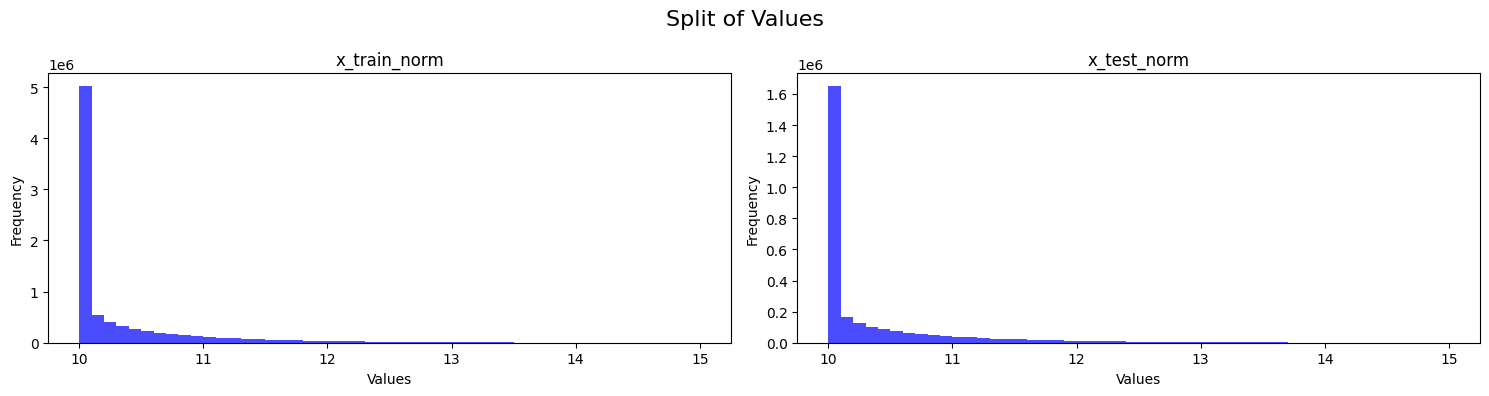

In [4]:
x_train_norm, x_test_norm = normalise_min_max_task_3(x_train, x_test)
plot_class_split_of_values([x_train_norm, x_test_norm], ["x_train_norm", "x_test_norm"])

---
## MLP Classifier Training

The model was trained with an MLP classifier, with the results being validated using Holdout, Cross Validation, K-fold Cross Validation, and Stratified K-fold Cross Validation.

The best accuracy received for training and testing before hyperparameter optimisation was `0.86` and `0.88`. It can be seen from the model's performance that it is better at generalising the test data than training data

In [5]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)
mlp_training_results = mlp_classifier(x_train_norm, x_test_norm, y_train, y_test)
save_model(mlp_training_results, "models/task3/mlp_results")

------ Holdout Validation ------
Training Accuracy: 0.9261111111111111
Testing Accuracy: 0.9085185185185185
------ Cross Validation ------
Mean Accuracy: 0.8969753086419752
------ Stratified K fold Validation ------
Mean Accuracy: 0.8695679012345681
Std Deviation: 0.022457685998731474
models/task3/mlp_results has the new model!


In [5]:
mlp_training_results = load_model("models/task3/mlp_results")

---
## Hyperparameter Configuration

After the model performance was evaluated, the best configuraton of hyperparameters was to be found....

In [ ]:
parameters = {
    "hidden_layers": [(50,50,50), (50,100,50), (100,)],
    "activations": ['tanh', 'relu'],
    "solvers": ['sgd', 'adam'],
    "alphas": [0.0001, 0.05]
}

best_config = find_best_configuration_mlp(parameters, x_train_norm, x_test_norm, y_train, y_test)
print(best_config)

----
## Evaluation

#### Classification Report

The classification report is made to evaluate the difference in key metrics between the model trained in task 3 to task 2. It can be seen that the performance overall is similar, with the trend of classes `3.0` and `6.0` being the worst performing in terms of precision and recall being similar 

In [6]:
fetch_classification_report(mlp_training_results, x_test_norm, y_test)

----- Classification Report -----
              precision    recall  f1-score   support

         0.0       0.82      0.98      0.89       613
         1.0       0.96      0.97      0.96       605
         2.0       0.92      0.93      0.92       628
         3.0       0.83      0.83      0.83       499
         4.0       0.94      0.94      0.94       507
         5.0       0.86      0.92      0.89       409
         6.0       0.90      0.74      0.81       481
         7.0       0.97      0.96      0.97       583
         8.0       0.91      0.83      0.87       511
         9.0       0.99      0.95      0.97       564

    accuracy                           0.91      5400
   macro avg       0.91      0.90      0.90      5400
weighted avg       0.91      0.91      0.91      5400



#### Confusion Matrix

The confusion matrix was plotted to see the split between 4 metrics - `True Positive`, `True Negative`, `False Positive`, and `False Negative` for each class. It was seen the data was more spread out even though the the weighted avg f1-score was 0.91, almost identical to the previous model's performance.

The eye catching insights were that for (i) class 3.0, it was wrongly being predicted as class 4.0 or 8.0 for `65%` of all the false negatives; (ii) class 9.0, it was wrongly predicted as class 1.0 `74%` of all false negatives.

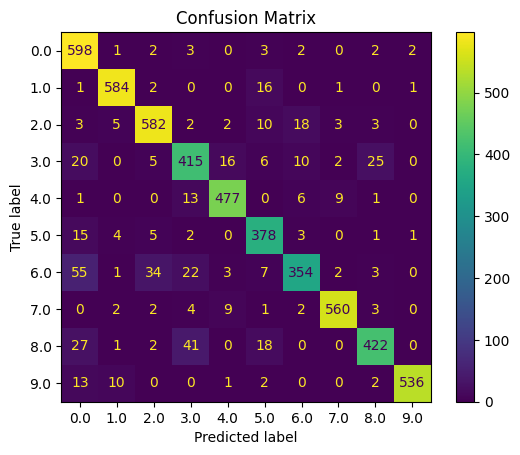

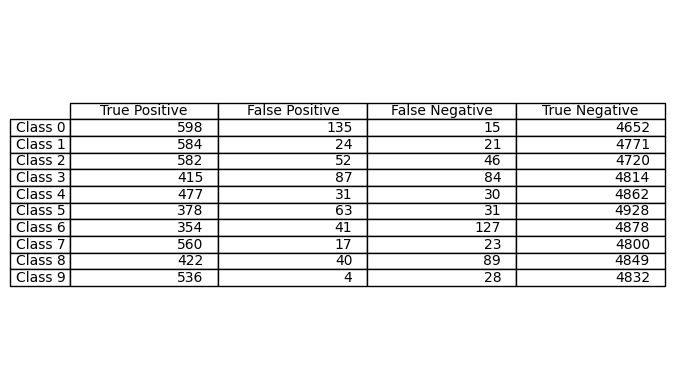

In [7]:
plot_confusion_matrix(mlp_training_results, x_test_norm, y_test, True)

#### Precision Recall, ROC, and DET Curve

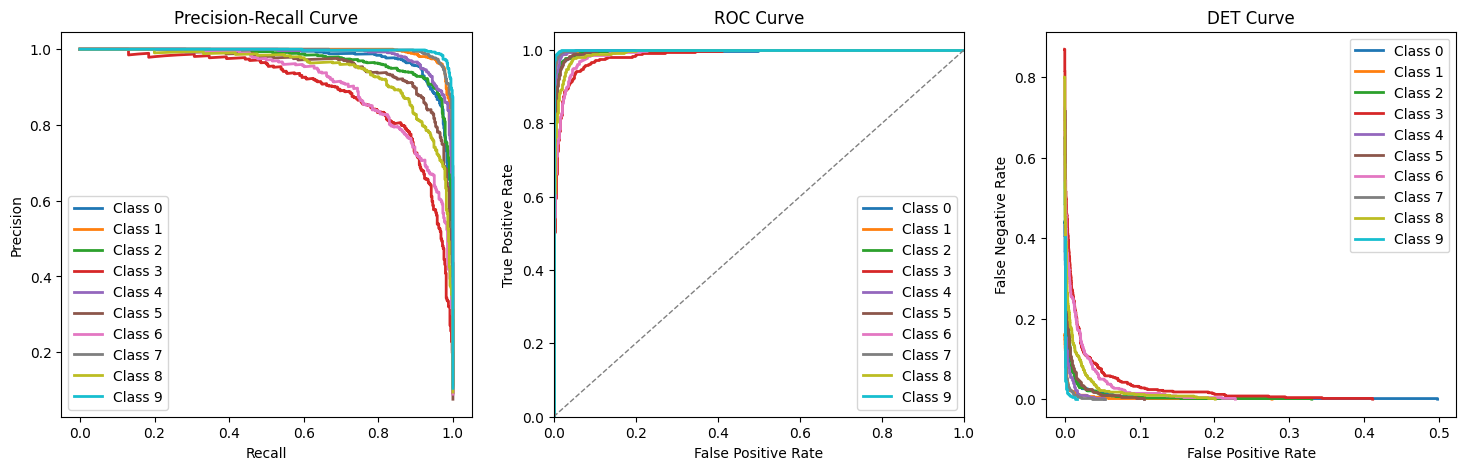

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
y_pred_prob = mlp_training_results.predict_proba(x_test_norm)
plot_precision_recall_curve(y_test, y_pred_prob, axes[0])
plot_roc_curve(y_test, y_pred_prob, axes[1])
plot_det_curve(y_test, y_pred_prob, axes[2])

#### Predicted vs Actual Values

An excerpt from both the predictions and actuals dataset was taken to visualise the difference between the two and in the cases where there was a mismatch, how severe it was. 

<b>Note - In this case, only 100 samples were taken as taking all made the visual unclear</b>

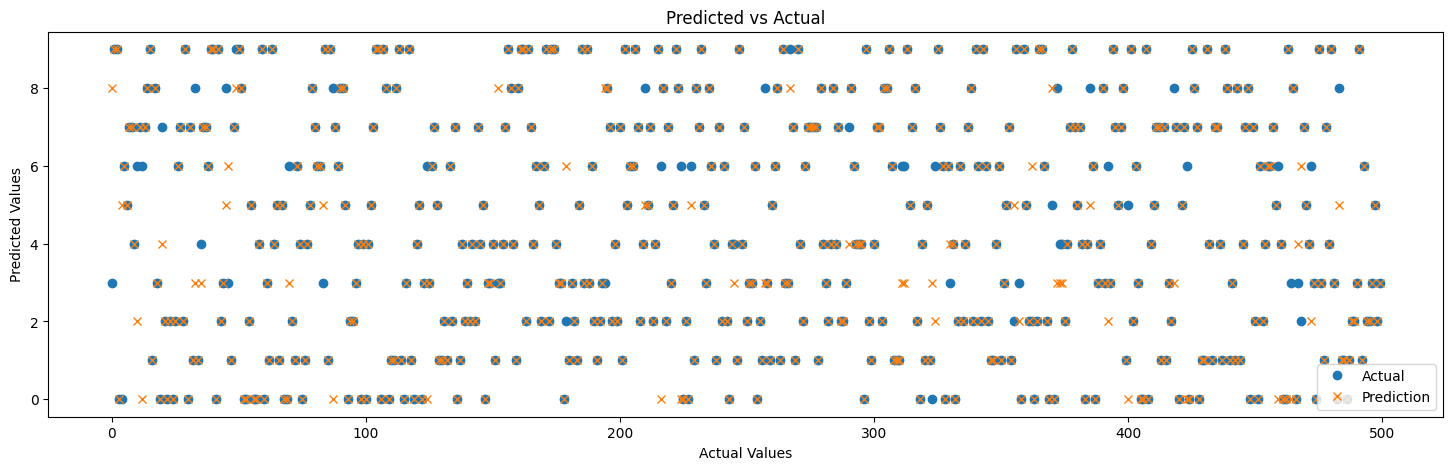

In [9]:
fig, axes = plt.subplots(figsize=(18, 5))
y_pred = mlp_training_results.predict(x_test_norm)
plot_predicted_vs_actual(y_test, y_pred, "Predicted vs Actual", axes, 500)

In [10]:
y_pred = mlp_training_results.predict(x_test_norm)
fetch_accuracy_score(y_test, y_pred)
fetch_log_loss(y_test, y_pred_prob)

Accuracy: 0.9085185185185185
Log Loss: 0.270507463086372


---
## Hypothesis Testing 

<b>Anything higher than 95% confidence is not good enough, which means the Task 2 and Task 3 models are not similar and a difference in the performance can be seen -> NULL HYPOTHESIS REJECTED</b>

In [12]:
# x_train_norm, x_test_norm = normalise_min_max_task_3(x_train, x_test)
x_train_norm_m, x_test_norm_m = normalise_min_max(x_train, x_test)
mlp_task3_scores = cross_val_score(mlp_training_results, x_test_norm, y_test)
mlp_task2 = load_model("models/task2/mlp_results")
mlp_task2_scores = cross_val_score(mlp_task2, x_test_norm_m, y_test)

t_statistic, p_value = ttest_ind(mlp_task2_scores, mlp_task3_scores, random_state=42)
confidence = 100 * (1 - p_value)
print(f"t-statistic - {t_statistic}")
print(f"p-value - {p_value}")
print(f"Confidence - {confidence}")

if confidence >= 95:
    print("Null hypothesis rejected!")
else:
    print("Failed to reject null hypothesis")

t-statistic - 2.9541731354887557
p-value - 0.01830852031296998
Confidence - 98.169147968703
Null hypothesis rejected!


<span style="font-weight:bold;">Markdown Question: What was the hypothesis you rejected in this task? How does p-value affect your decision?
(150 words)</span>

<span style="font-weight: bold; color: blue">Answer:</span> The hypothesis rejected is the null hypothesis, which states that no significant difference exists between the performance of models trained with original and rescaled features in tasks 3.2 and 3.3. The p-value provides a significance level for comparing the alternative hypothesis against the null hypothesis, which are the models after and before rescaling, respectively. The p-value obtained (0.0024915689812400536) in this instance is lower than 0.05, which was the decided significance level (alpha), indicating strong evidence against the null hypothesis. Hence, the null hypothesis was rejected and concluded that there is a statistically significant difference in the performance of the models. If the p-value is over the benchmark, it concludes that there is not enough evidence to reject the null hypothesis.